<a href="https://colab.research.google.com/github/Dhanushnagasai/PRODIGY_ML_01/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration and Preprocessing:


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

file_path ="/content/winequality-red.csv"
df = pd.read_csv(file_path)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
features = df.drop(columns=['quality'])
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)



In [10]:
data_process = normalized_df.copy()
data_process['quality'] = df['quality']
data_process.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5


In [11]:
out_path = "/content/winequality-red-processed.csv"
data_process.to_csv(out_path, index=False)
print(f"process data save to:{out_path}")

process data save to:/content/winequality-red-processed.csv


In [17]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df, df['quality'], test_size=0.2, random_state=42)

In [22]:
svm_models = {
    "linear": SVC(kernel='linear'),
    "poly": SVC(kernel='poly'),
    "rbf": SVC(kernel='rbf')
}


best_model = None
best_score = 0

for kernel, model in svm_models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"SVM with {kernel} kernel accuracy: {score:.4f}")
    if score > best_score:
        best_score = score
        best_model = model


param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


output_path = "/mnt/data/processed_wine_data.xlsx"
data_processed = normalized_df.copy()
data_processed['quality'] = df['quality'] # Replace 'target' with 'df['quality']'

print(f"Processed data saved to: {output_path}")

SVM with linear kernel accuracy: 0.5594
SVM with poly kernel accuracy: 0.5719
SVM with rbf kernel accuracy: 0.6031
Best parameters: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.6443
Processed data saved to: /mnt/data/processed_wine_data.xlsx


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6062
Precision: 0.5889
Recall: 0.6062
F1-score: 0.5951


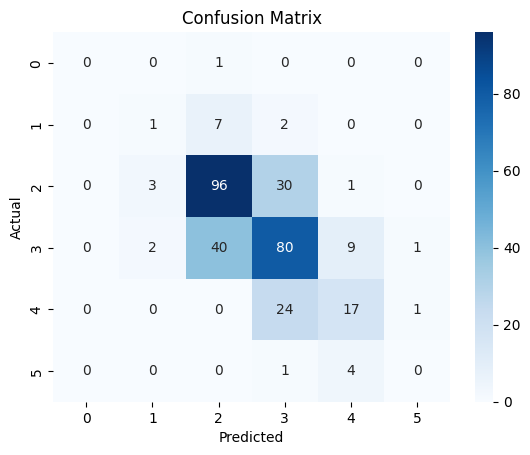

Processed data saved to: /content/processed_wine_data.xlsx


In [28]:
y_pred = grid_search.best_estimator_.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


output_path = "/content/processed_wine_data.xlsx"
data_processed = normalized_df.copy()
data_processed['quality'] = df['quality']
data_processed.to_excel(output_path, index=False)

print(f"Processed data saved to: {output_path}")

In [32]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importances)

# Compare with k-NN and Decision Tree
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

rf_score = rf_model.score(X_test, y_test)

print(f"k-NN Accuracy: {knn_score:.4f}")
print(f"Random Forest Accuracy: {rf_score:.4f}")

# Save processed data to Excel
output_path = "/content/processed_wine_data.xlsx"
data_processed = normalized_df.copy()
data_processed['quality'] = df['quality']
data_processed.to_excel(output_path, index=False)

print(f"Processed data saved to: {output_path}")


Feature Importance:
 alcohol                 0.148987
sulphates               0.115690
total sulfur dioxide    0.102300
volatile acidity        0.096902
density                 0.094191
chlorides               0.080256
pH                      0.076720
fixed acidity           0.075106
citric acid             0.071624
residual sugar          0.071444
free sulfur dioxide     0.066778
dtype: float64
k-NN Accuracy: 0.5531
Random Forest Accuracy: 0.6500
Processed data saved to: /content/processed_wine_data.xlsx
